# Introduction to PyCBC Inference 1: Analytic tests
### Collin Capano

## Overview

The executable ``pycbc_inference`` is designed to sample the parameter space
and save the samples in an HDF file. A high-level description of the
``pycbc_inference`` algorithm is

 1. Read priors from a configuration file.

 2. Setup the model to use. If the model uses data, then:

    * Read gravitational-wave strain from a gravitational-wave model or use
      recolored fake strain.

    * Estimate a PSD.

 3. Run a sampler to estimate the posterior distribution of the model.

 4. Write the samples and metadata to an HDF file.

The model, sampler, parameters to vary and their priors are specified in a
configuration file, which is passed to the program using the ``--config-file``
option. Other command-line options determine what data to load (if the model
uses data) and what parallelization settings to use. For a full listing of all
options run ``pycbc_inference --help``.

In this tutorial we go over how to set up and run `pycbc_inference` to do Bayesian Inference. We show how to run on simple analytic examples, and how to plot the results.

This tutorial largely follows the online documentation for `pycbc_inference`, which can be found [here](https://pycbc.org/pycbc/latest/html/inference.html). As `pycbc_inference` is a command-line tool, most of the commands below are carried out as if they were in a bash script using `!`.

### Prerequisites

We will need the most recent version of pycbc installed for this tutorial.

In [1]:
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

# This is needed to access the executables on sciserver. On a personal machine this should be ignore.
path = %env PATH
%env PATH=$path:/home/idies/miniconda3/envs/py27/bin 

env: PATH=/home/idies/miniconda3/bin:/home/idies/miniconda3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/home/idies/miniconda3/envs/py27/bin


In [2]:
from __future__ import print_function

from IPython.display import Image
from IPython.core.display import HTML

## Example: 2D normal distribution

Several analytic distributions are available to run tests on. These can be run
quickly on a laptop to check that a sampler is working properly.

This example demonstrates how to sample a 2D normal distribution with the
``emcee`` sampler.

### 1. The config file

In order to do a parameter estimation run, we need a configuration file. This tells `pycbc_inference` what parameters we will sample, what prior to use, the model that we are sampling, and what sampler to use.

In this example we will use the provided [normal2d.ini](normal2d.ini) file. You can view the file by going to the Jupyter notebook manager and clicking on `normal2d.ini`. When looking at the file, note the following:

 * We have selected the analytic distribution to run on by setting the `model` name to `test_normal`. This causes us to run using the [TestNormal](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestNormal) model.
 * The number of dimensions of the analytic distribution are set by the number of parameters in the `[variable_params]` section.
 * The prior to use on parameter is set with the `[prior-{param}]` sections.
 * The names of the parameters do not matter, just that the prior sections use the same names.
 * The settings to use for the sampler (in this case `emcee`) are set in the `[sampler]` section.

### 2. Run `pycbc_inference`

Once we have a configuration file, we can run `pycbc_inference`. Since we are running on an analytic configuration, we do not need to provide any data arguments. All we need to provide is the config file, the output file, the number of processes to use and (optionally) a starting seed for the random number generator.

In [3]:
!pycbc_inference --verbose \
        --config-files normal2d.ini \
        --output-file normal2d.hdf \
        --nprocesses 2 \
        --seed 10

2019-05-13 16:30:17,038 Using seed 10
2019-05-13 16:30:17,040 Running with CPU support: 1 threads
2019-05-13 16:30:17,041 Reading configuration file
2019-05-13 16:30:17,043 Setting up model
2019-05-13 16:30:17,043 Setting up priors for each parameter
2019-05-13 16:30:17,045 No sampling_params section read from config file
2019-05-13 16:30:17,047 Setting up sampler
2019-05-13 16:30:17,077 Looking for checkpoint file
2019-05-13 16:30:17,078 Checkpoint not found or not valid
2019-05-13 16:30:17,078 Creating file normal2d.hdf.checkpoint
2019-05-13 16:30:17,241 Running sampler for 0 to 200 iterations
2019-05-13 16:31:00,532 Writing samples to normal2d.hdf.checkpoint with thin interval 1
2019-05-13 16:31:00,735 Writing samples to normal2d.hdf.bkup with thin interval 1
2019-05-13 16:31:00,882 Updating burn in
2019-05-13 16:31:00,886 Is burned in: True
2019-05-13 16:31:00,889 Burn-in iteration: 100
2019-05-13 16:31:00,889 Computing acls
2019-05-13 16:31:00,928 ACT: 11
2019-05-13 16:31:00,959 V

This created an output file called `normal2d.hdf`, which contains the samples.

### 3. Plot the posterior samples

There are a number of plotting programs in PyCBC for examining inference results. The most often used is `pycbc_inference_plot_posterior`. This program reads the output hdf file and plots the posteriors. Let's run that to see our results:

In [4]:
!pycbc_inference_plot_posterior --verbose \
        --input-file normal2d.hdf \
        --output-file posterior-normal2d.png \
        --parameters x y \
        --plot-scatter \
        --plot-contours \
        --plot-marginal \
        --z-arg 'loglikelihood:$\log p(h|\vartheta)$'

2019-05-13 16:31:06,623 Reading input file normal2d.hdf
2019-05-13 16:31:06,626 Loading samples
2019-05-13 16:31:06,647 Using 10000 samples
2019-05-13 16:31:06,647 Getting samples for colorbar
2019-05-13 16:31:06,658 Plotting
2019-05-13 16:31:24,058 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-13 16:31:24,067 findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-05-13 16:31:24,070 findfont: Matching :family=STIXSizeOneSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeOneSym (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/m

2019-05-13 16:31:26,868 Done


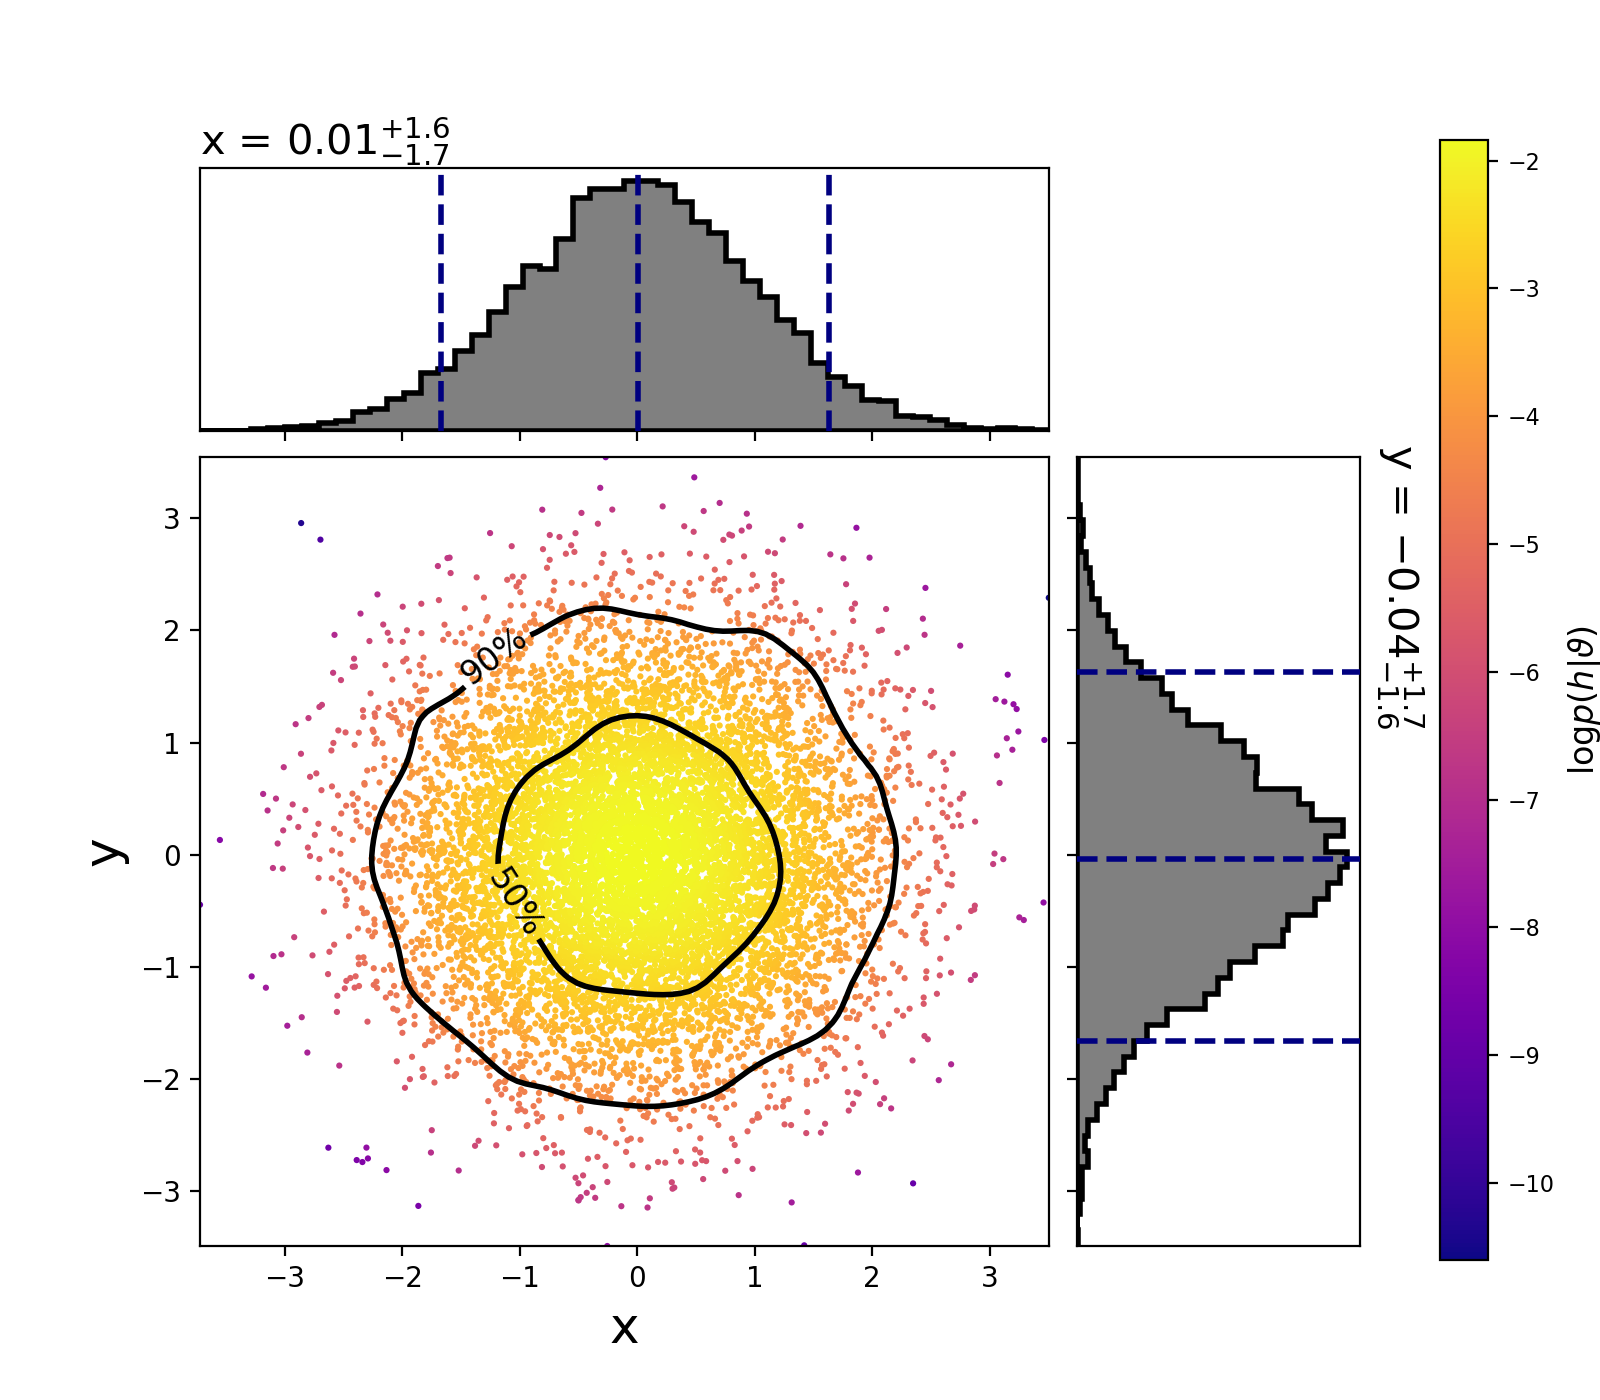

In [5]:
Image(filename="posterior-normal2d.png", width=640, height=480)

The scatter points show each walker's position after the last iteration. The
points are colored by the log likelihood at that point, with the 50th and 90th
percentile contours drawn.

#### Alternatively, we can create a density plot of the posterior:

In [6]:
!pycbc_inference_plot_posterior --verbose \
        --input-file normal2d.hdf \
        --output-file density-normal2d.png \
        --parameters x y \
        --plot-density \
        --plot-contours \
        --plot-marginal \
        --contour-color white

2019-05-13 16:31:32,571 Reading input file normal2d.hdf
2019-05-13 16:31:32,574 Loading samples
2019-05-13 16:31:32,597 Using 10000 samples
2019-05-13 16:31:32,598 Plotting
2019-05-13 16:31:49,843 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-13 16:31:49,852 findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-05-13 16:31:49,855 findfont: Matching :family=STIXSizeOneSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeOneSym (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf') w

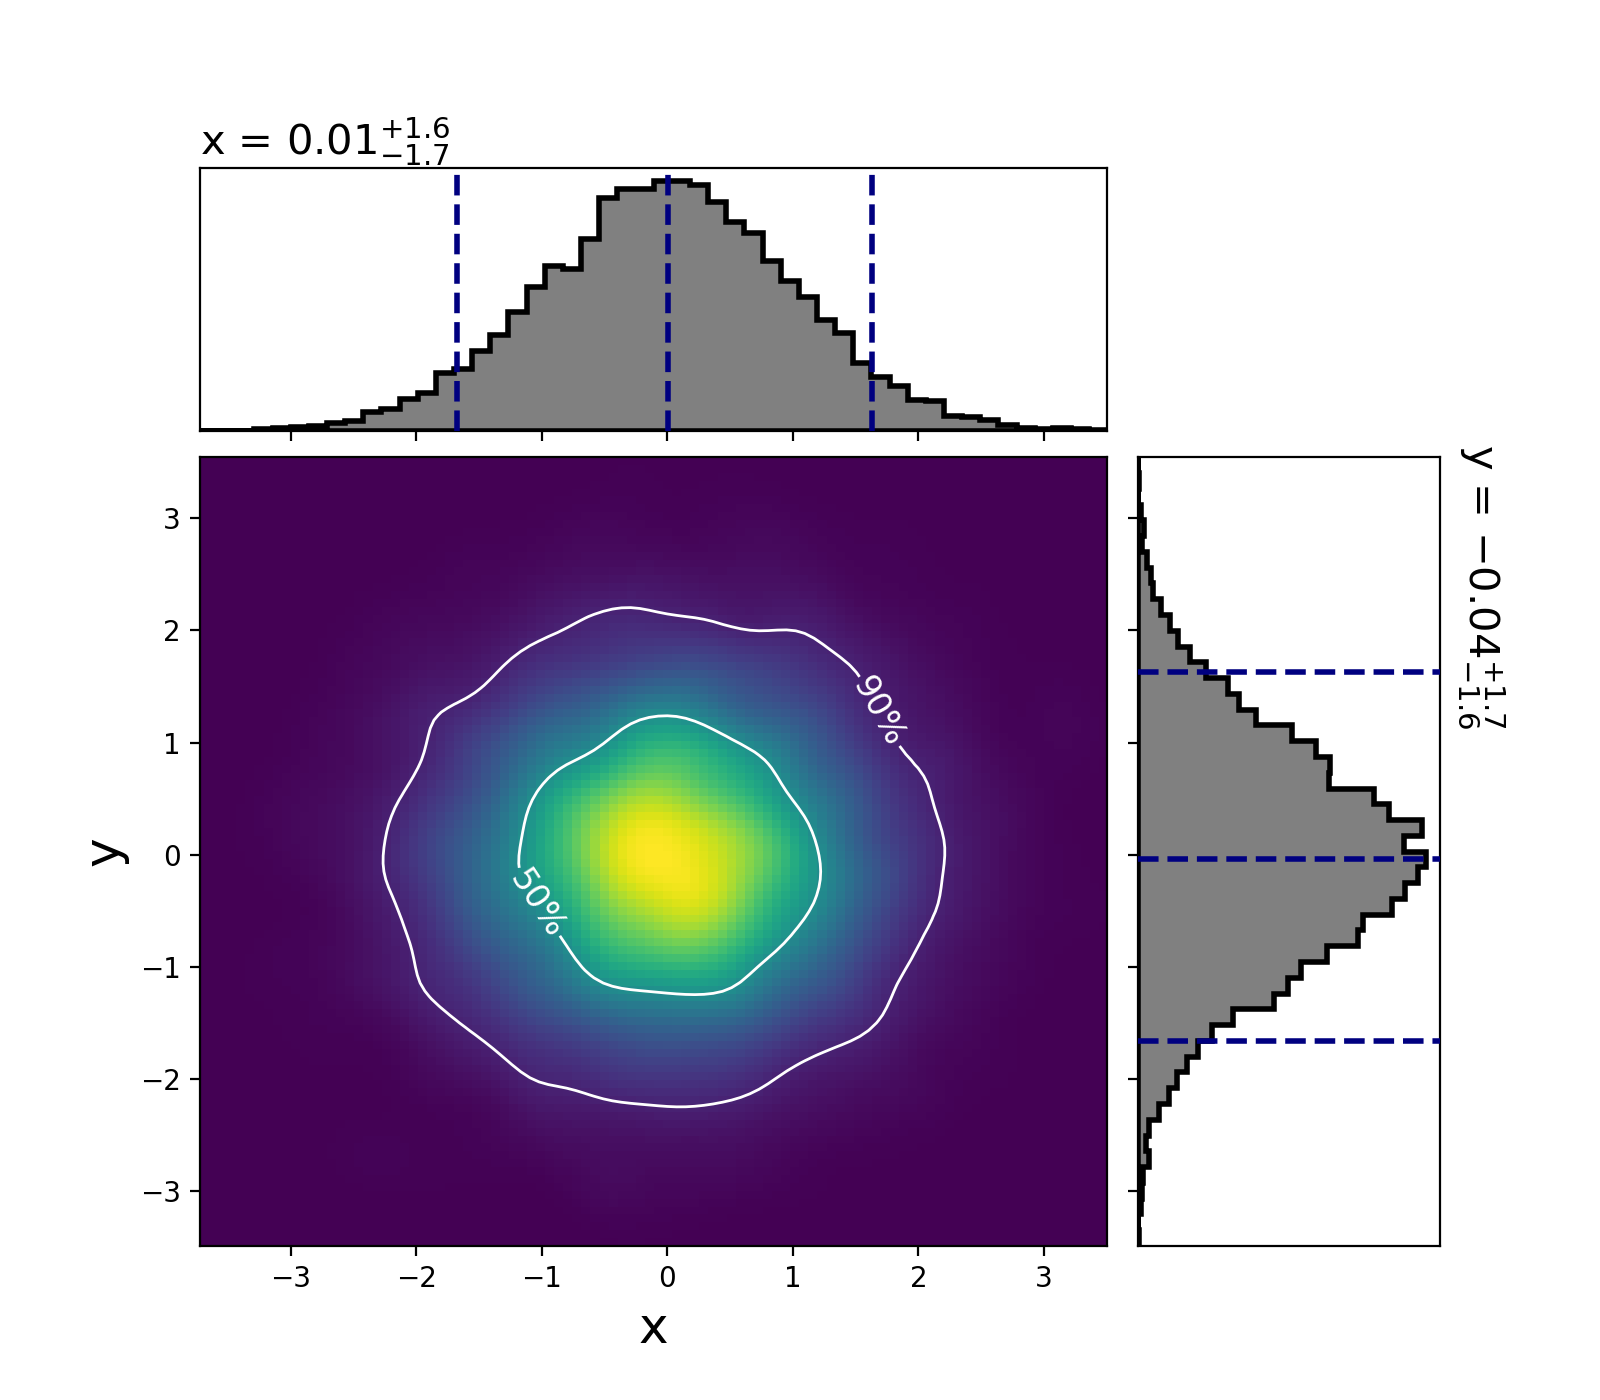

In [7]:
Image(filename="density-normal2d.png", width=640, height=480)

## 4. Diagnostic plots (MCMC)

### The autocorrelation function

The program `pycbc_inference_plot_acf` averages each parameter chain over all of the walkers, then calculates the [autocorrelation function](http://pycbc.org/pycbc/latest/html/pycbc.filter.html#pycbc.filter.autocorrelation.calculate_acf) (ACF) and plots it. By default, the autocorrelation function is only calculated over the iterations post burn-in (in this case, the second half of the chains).

In [8]:
!pycbc_inference_plot_acf --input-file normal2d.hdf \
    --output-file plotacf.png \
    --parameters x y \
    --verbose

2019-05-13 16:31:57,926 Loading parameters
2019-05-13 16:31:57,927 Reading input file normal2d.hdf
2019-05-13 16:31:57,930 Calculating autocorrelation functions
2019-05-13 16:31:57,956 Plotting autocorrelation functions
2019-05-13 16:31:57,992 Parameter x
2019-05-13 16:31:57,997 Parameter y
2019-05-13 16:31:58,040 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-13 16:31:58,384 STREAM 'IHDR' 16 13
2019-05-13 16:31:58,384 STREAM 'sBIT' 41 4
2019-05-13 16:31:58,385 'sBIT' 41 4 (unknown)
2019-05-13 16:31:58,385 STREAM 'pHYs' 57 9
2019-05-13 16:31:58,385 STREAM 'tEXt' 78 57
2019-05-13 16:31:58,385 STREAM 'IDAT' 147 8192
2019-05-13 16:31:58,556 Done


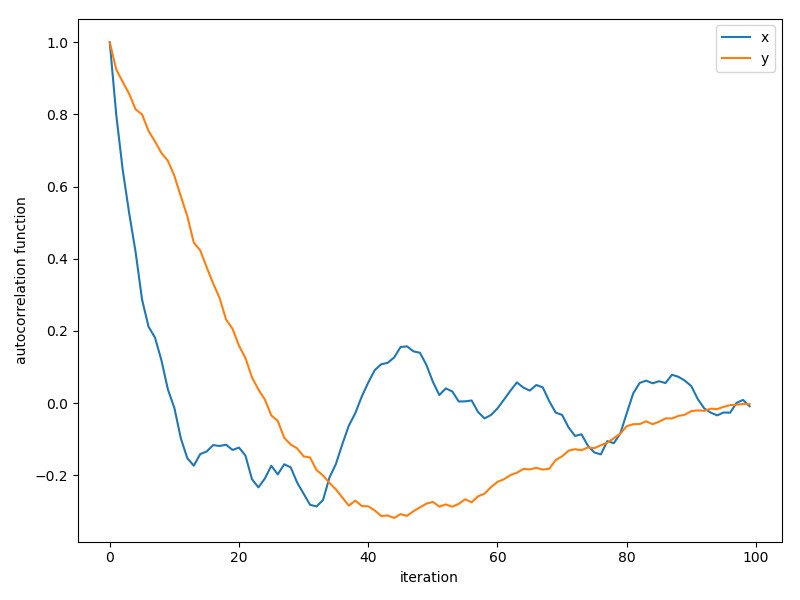

In [9]:
Image(filename="plotacf.png", width=640, height=480)

### The autocorrelation time

The program `pycbc_inference_plot_acl` calculates and plots the [autocorrelation length](http://pycbc.org/pycbc/latest/html/pycbc.filter.html#pycbc.filter.autocorrelation.calculate_acl) (ACL) of each walker separately and histograms the result.

In [10]:
!pycbc_inference_plot_acl --input-file normal2d.hdf \
    --output-file plotacl.png \
    --verbose

2019-05-13 16:32:04,146 Reading input file normal2d.hdf
2019-05-13 16:32:04,150 Calculating autocorrelation length
2019-05-13 16:32:11,000 Plotting autocorrelation times
2019-05-13 16:32:17,918 Plotting autocorrelation times
2019-05-13 16:32:18,008 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-13 16:32:18,277 STREAM 'IHDR' 16 13
2019-05-13 16:32:18,277 STREAM 'sBIT' 41 4
2019-05-13 16:32:18,278 'sBIT' 41 4 (unknown)
2019-05-13 16:32:18,278 STREAM 'pHYs' 57 9
2019-05-13 16:32:18,278 STREAM 'tEXt' 78 57
2019-05-13 16:32:18,278 STREAM 'IDAT' 147 8192
2019-05-13 16:32:18,381 Done


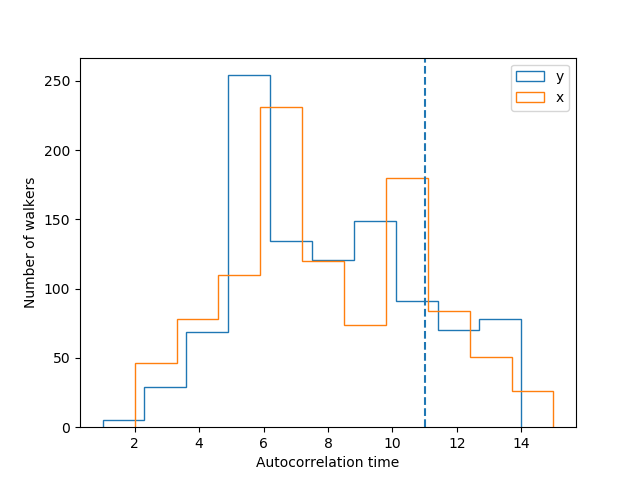

In [11]:
Image(filename="plotacl.png", width=640, height=480)

### Chain plots

The program `pycbc_inference_plot_samples` will plot each parameter as a function of iteration.

Note that we provide `--thin-start 0` and `--thin-interval 1` arguments. This is so we can see the entire chain, with every iteration plotted. Without them, the program will read samples starting from the burn in iteration (in this case, the halfway point), thinned by the autocorrelation length. This is true of any program that has these `thin-start/thin-interval` options.

In [12]:
!pycbc_inference_plot_samples --verbose \
    --input-file normal2d.hdf \
    --output-file samples_chain.png \
    --parameters x y \
    --thin-start 0 \
    --thin-interval 1

2019-05-13 16:32:23,954 Reading input file normal2d.hdf
2019-05-13 16:32:23,959 Plotting samples
2019-05-13 16:32:34,854 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-13 16:32:35,341 STREAM 'IHDR' 16 13
2019-05-13 16:32:35,342 STREAM 'sBIT' 41 4
2019-05-13 16:32:35,342 'sBIT' 41 4 (unknown)
2019-05-13 16:32:35,342 STREAM 'pHYs' 57 9
2019-05-13 16:32:35,342 STREAM 'tEXt' 78 57
2019-05-13 16:32:35,343 STREAM 'IDAT' 147 8192
2019-05-13 16:32:35,605 Done


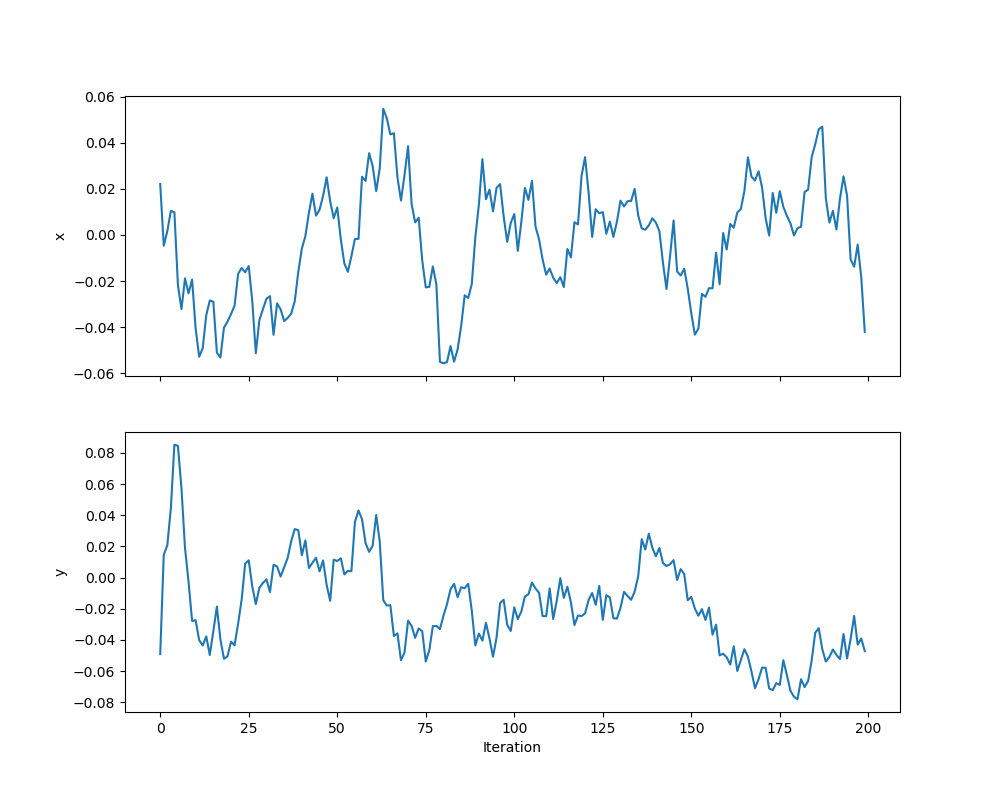

In [13]:
Image(filename="samples_chain.png", width=640, height=480)

By default, this program will average the chains over all of the walkers. This is why there was a single line. However, you can plot each walker separately by adding the option `--walkers all`. **Try it!**

### The acceptance rate

This plots the acceptance rate, which for `emcee` is the average number of proposals that were accepted for each walker (aka the [acceptance fraction](http://dfm.io/emcee/current/api/#emcee.EnsembleSampler.acceptance_fraction)).

*Note: for the `emcee` and `emcee_pt` samplers, the average is done over all iterations since the last checkpoint. Since we are using no checkpointing here (see the next tutorial for details on checkpointing), this is the average over all iterations.*

In [14]:
!pycbc_inference_plot_acceptance_rate --input-file normal2d.hdf \
    --output-file acceptance_rate.png \
    --verbose

2019-05-13 16:32:41,313 Reading input file
2019-05-13 16:32:41,322 Plotting acceptance fraction
2019-05-13 16:32:41,398 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/idies/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-13 16:32:41,590 STREAM 'IHDR' 16 13
2019-05-13 16:32:41,590 STREAM 'sBIT' 41 4
2019-05-13 16:32:41,590 'sBIT' 41 4 (unknown)
2019-05-13 16:32:41,590 STREAM 'pHYs' 57 9
2019-05-13 16:32:41,591 STREAM 'tEXt' 78 57
2019-05-13 16:32:41,591 STREAM 'IDAT' 147 8192
2019-05-13 16:32:41,685 Done


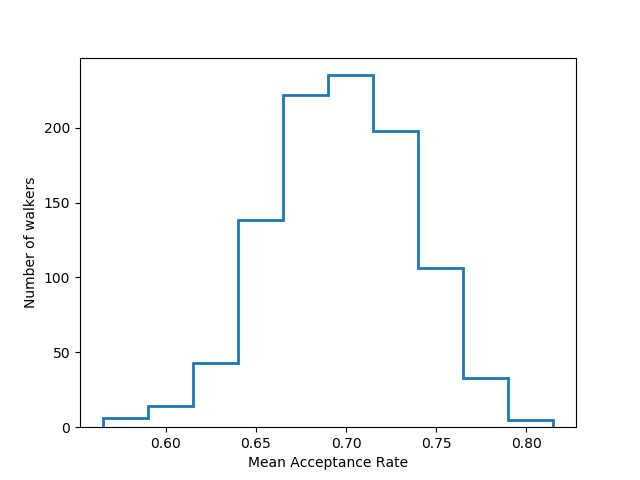

In [15]:
Image(filename="acceptance_rate.png", width=640, height=480)

### A movie of the results

We can use `pycbc_inference_plot_movie` to make a movie showing how each of the walkers evolved with time.

*Note: this requires `ffmpeg` to be installed if you were to run the following command.* We've included the output it would produce.

In [19]:
#!pycbc_inference_plot_movie --verbose \
#        --nprocesses 4 \
#        --input-file normal2d.hdf \
#        --output-prefix frames-normal2d \
#        --movie-file normal2d_mcmc_evolution.mp4 \
#        --cleanup \
#        --plot-scatter \
#        --plot-contours \
#        --plot-marginal \
#        --z-arg 'loglikelihood:$\log p(h|\vartheta)$' \
#        --frame-step 1

In [20]:
HTML("""
<video width="640" height="480" controls>
  <source src="normal2d_mcmc_evolution.mp4" type="video/mp4">
</video>
""")

## Other test distributions

Several other test models exist in the `pycbc.inference.models` package. They are the models that begin with `Test`. The full list:

|Name                   |Class                                                     |
|-----------------------|----------------------------------------------------------|
| ``'test_eggbox'``     | [TestEggbox](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestEggbox) |
| ``'test_normal'``     | [TestNormal](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestNormal) |
| ``'test_prior'``      | [TestPrior](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestPrior) |
| ``'test_rosenbrock'`` | [TestRosenbrock](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestRosenbrock) |
| ``'test_volcano'``    | [TestVolcano](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestVolcano) |


## Challenges:
 1. Repeat the above analysis, but test on a 3D Rosenbrock distribution using the [TestRosenbrock](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestRosenbrock) model. Call the third variable `z`, and set its prior to be uniform $\in [0, 10)$. Change the name of the output file so as not to overwrite your previous results.

 2. Repeat the 3D Rosenbrock challenge, but using `emcee_pt` as the sampler. Use 4 temperatures.